In [1]:
import math
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from main import nmf_son, nmf_son_acc
from sklearn.decomposition import NMF
from mpl_toolkits.axes_grid1 import make_axes_locatable


np.random.seed(42)
np.set_printoptions(precision=3)

In [2]:
def normalized_similarity(W_ins):
    r = W_ins.shape[1]
    res = np.ones(shape=(r, r)) * -1
    for i in range(r):
        for j in range(r):
            res[i, j] = np.linalg.norm(W_ins[:, i] - W_ins[:, j])
        res[i, :] = res[i, :] / sum(res[i, :])
    return res

def plot_scores(fscores, gscores, lambda_vals):
    def plot_ax(ax, f, g, total):
        ax.plot(total, color='black', linewidth=3, label='total')
        ax.plot(f, label='f')
        ax.plot(g, label='g')
        ax.legend()

    total_score = fscores + lambda_vals * gscores
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))

    axs[0].set_yscale('log')
    plot_ax(axs[0], fscores, gscores, total_score)
    axs[0].set_title('log scale', fontsize=16)

    axs[1].set_yscale('log')
    plot_ax(axs[1], fscores - fscores[-1], gscores - gscores[-1], total_score - total_score[-1])
    axs[1].set_title('log(score - score*)', fontsize=16)

def plot_matrices(W, H, img_size, comparison_idxs, share_y=False):
    fig, axs = plt.subplots(2, len(comparison_idxs), figsize=(20, 10), sharey='row' if share_y else False)

    for i, idx in enumerate(comparison_idxs):
        axs[0, i].plot(W[:, idx] / np.dot(W[:, idx], W[:, idx]))
        axs[0, i].set_title(f'W({idx+1})')

        h_idx_3d = H[idx, :].reshape(img_size, order='F')
        axs[1, i].plot(h_idx_3d)
        axs[1, i].set_title(f'H({idx+1})')

def plot_images(H, img_size, comparison_idxs):
    fig, axs = plt.subplots(1, len(comparison_idxs), figsize=(20, 10))

    for i, idx in enumerate(comparison_idxs):
        h_idx_3d = H[idx, :].reshape(img_size, order='F')

        axs[i].imshow(h_idx_3d)
        img = axs[i].imshow(h_idx_3d, cmap='gray')
        divider = make_axes_locatable(axs[i])

        cax = divider.append_axes('right', size='5%', pad=0.1)
        fig.colorbar(img, cax=cax, orientation='vertical')
        axs[i].set_title(f'H({idx+1})')

def load_results(filepath):
    data = np.load(filepath)
    return data['Wb'], data['Hb'], data['Wl'], data['Hl'], data['fscores'], data['gscores'], data['lambda_vals']

In [3]:
mat = scipy.io.loadmat('../jasper/jasper.mat')
X3d = mat['X']
X = X3d.reshape(100 * 100, -1, order='F').T
X3d_new = X.reshape(-1, 100, 100, order='F')

In [4]:
(X < 0).sum()

16017

In [5]:
X[X < 0] = 0

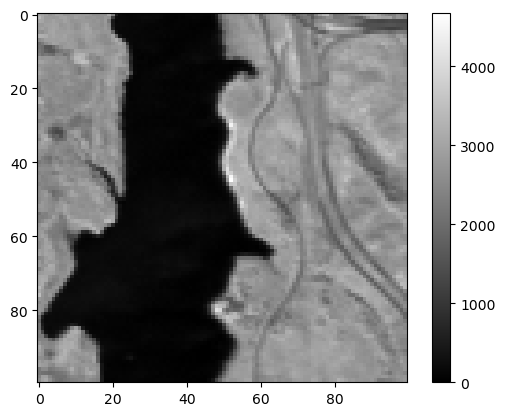

In [6]:
wavelength = 80
plt.imshow(X3d_new[wavelength, :, :], cmap='gray')
plt.colorbar()

In [7]:
# plt.plot(X)

In [8]:
# model = NMF(n_components=4, init='random', random_state=42, max_iter=5000)
# vanillaW = model.fit_transform(X)
# vanillaH = model.components_
#
img_size = (100, 100)
# plot_matrices(vanillaW, vanillaH, img_size, range(4), share_y=True)

In [9]:
# plot_images(vanillaH, img_size, range(4))

In [10]:
m, n = X.shape
rank = 6

ini_W = np.random.rand(m, rank)
ini_H = np.random.rand(rank, n)

In [11]:
Wb, Hb, Wl, Hl, fscores, gscores, lvals = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=2, itermax=1000, early_stop=True)

nan
0.9950166044967315
0.5214007671106412
0.15092655850558387
0.07070218290987884
0.04592484895490275
0.038744691154277235
0.037541647663365166
0.038027032262623606
0.038755358613645985
0.038335372806653195
0.03616727248853998
0.03285472127358636
0.029048421967118015
0.025380522660208436
0.02232783903361458
0.01925651152419544
0.016492293914987716
0.014287059464548434
0.012401457410291581
0.010884464936233301
0.00964302437598697
0.008611482973630704
0.007778119690309168
0.007082092181752082
0.006489712490954111
0.005986752636821831
0.005548070352253352
0.0051593608870238615
0.004800035297633103
0.0044781404275891
0.004190857747869861
0.003929650280125063
0.0036951043571268835
0.0034833070006704326
0.0032868860841604344
0.0031083698064848487
0.002944662599618736
0.0027914481032777403
0.0026492056266097675
0.0025190438064262364
0.0024007297289893813
0.0022912744365571696
0.002189851852719752
0.0020951252358092877
0.002005810315347344
0.0019214837492777187
0.0018425688864558679
0.00177084

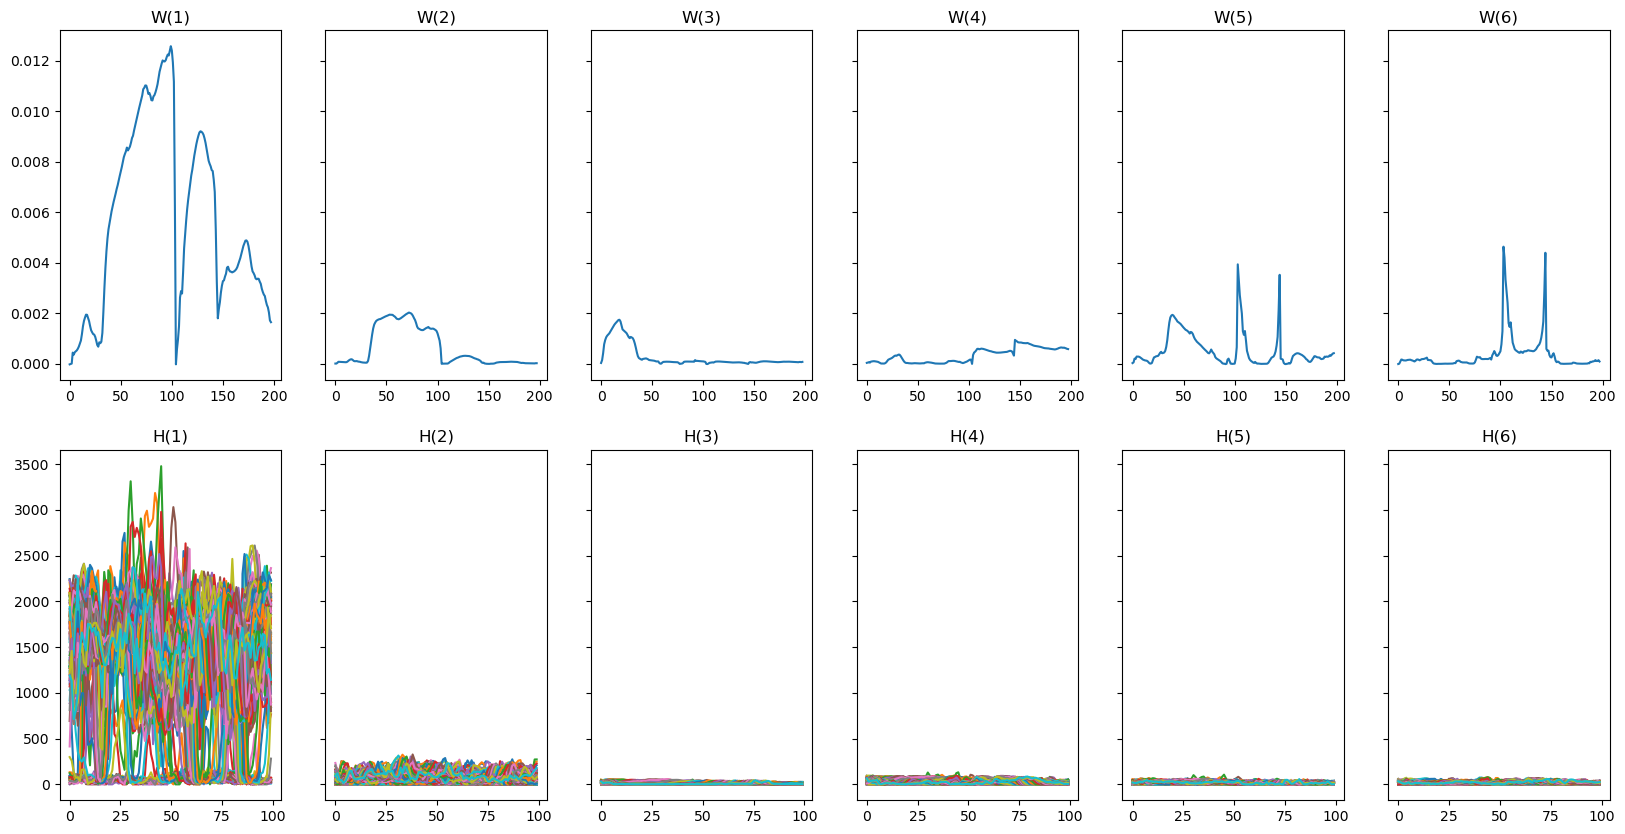

In [12]:
plot_matrices(Wl, Hl, img_size, range(rank), share_y=True)

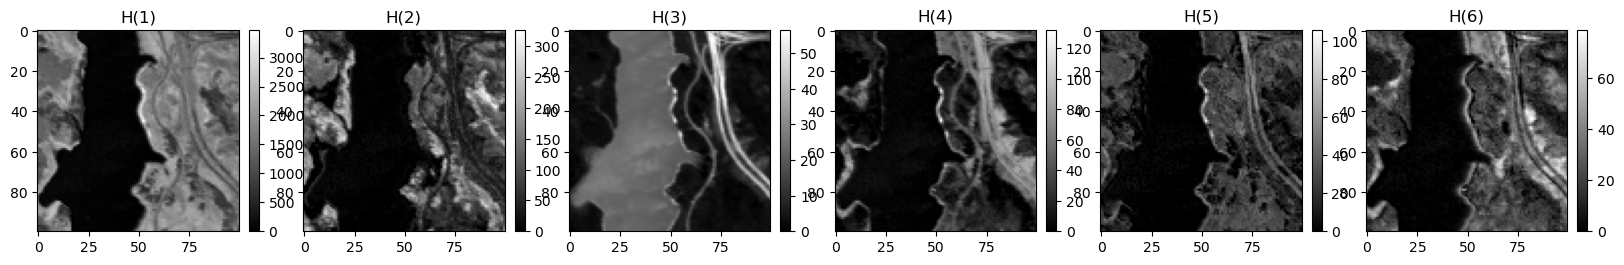

In [13]:
plot_images(Hl, img_size, range(rank))

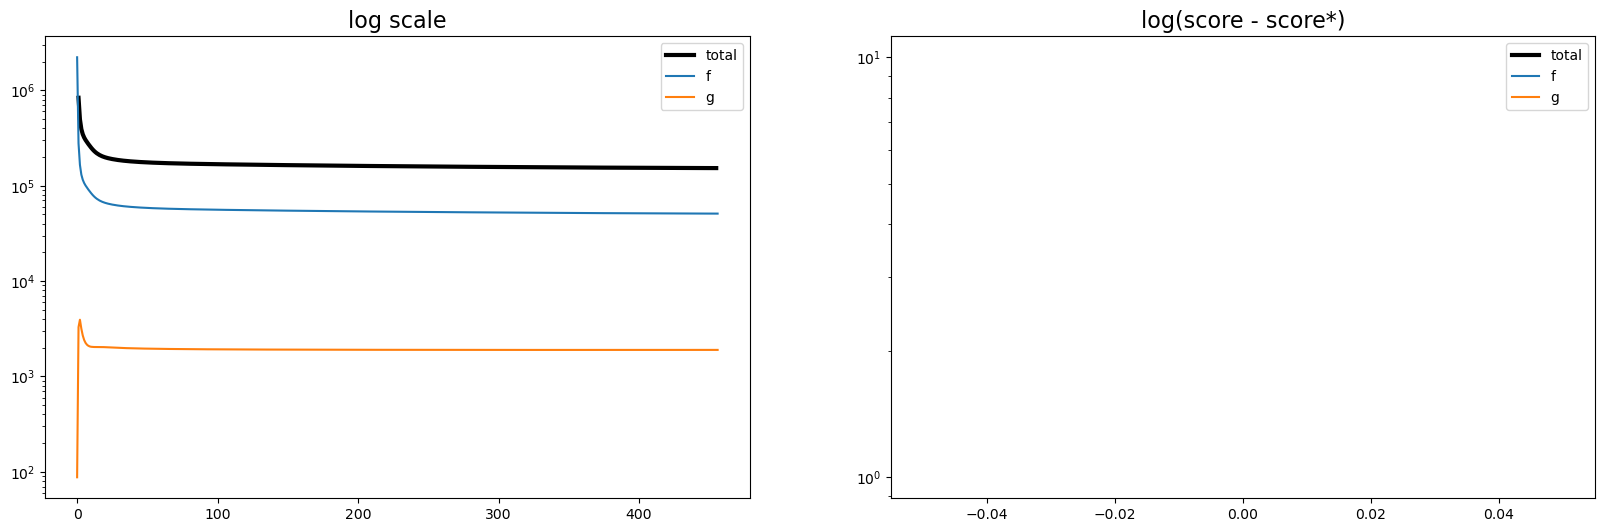

In [14]:
plot_scores(fscores, gscores, lvals)

In [15]:
fscores[fscores <= 0] = np.NaN
gscores[gscores <= 0] = np.NaN
lvals[lvals <= 0] = np.NaN